### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load Dataset
df = pd.read_csv("data/merged_dataset.csv")

In [6]:
df.head()

,Emotion,Text
0,anger,im grabbing a minute to post i feel greedy wrong
1,love,i am ever feeling nostalgic about the fireplac...
2,anger,i am feeling grouchy
3,surprise,ive been taking or milligrams or times recomme...
4,fear,i feel as confused about life as a teenager or...


In [7]:
df = df[df.Emotion != "joy"]

In [8]:
df

,Emotion,Text
0,anger,im grabbing a minute to post i feel greedy wrong
1,love,i am ever feeling nostalgic about the fireplac...
2,anger,i am feeling grouchy
3,surprise,ive been taking or milligrams or times recomme...
4,fear,i feel as confused about life as a teenager or...
...,...,...
49977,neutral,Not yet .
49981,surprise,@MichelGW have you gift! Hope you like it! It'...
49983,anger,A man robbed me today .
49984,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [9]:
# Value Counts
df['Emotion'].value_counts()

fear        8062
anger       7290
happy       7029
sadness     6722
surprise    4941
neutral     2254
love        1641
disgust      856
shame        146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

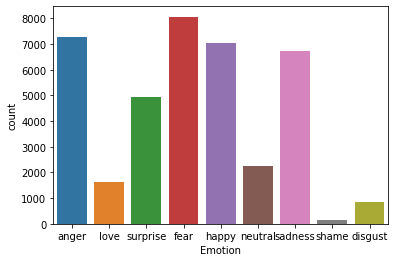

In [10]:
# Plot
sns.countplot(x='Emotion',data=df)

In [11]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [14]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [15]:
df

,Emotion,Text,Clean_Text
0,anger,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
1,love,i am ever feeling nostalgic about the fireplac...,feeling nostalgic fireplace know property
2,anger,i am feeling grouchy,feeling grouchy
3,surprise,ive been taking or milligrams or times recomme...,ive taking milligrams times recommended ive fa...
4,fear,i feel as confused about life as a teenager or...,feel confused life teenager jaded year old man
...,...,...,...
49977,neutral,Not yet .,.
49981,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
49983,anger,A man robbed me today .,man robbed today .
49984,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [16]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [17]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [18]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [19]:
# from sklearn.neighbors import KNeighborsClassifier

# pipe_kn = Pipeline(steps=[('cv',CountVectorizer()),('neigh',KNeighborsClassifier(n_neighbors=2))])
# pipe_kn.fit(x_train,y_train)

In [20]:
# pipe_kn.score(x_test,y_test)

In [21]:
# ex1 = "Rape is a serious crime and people have to take a careful note on it"
# pipe_kn.predict([ex1])

In [22]:
from sklearn import tree
pipe_t = Pipeline(steps=[('cv',CountVectorizer()),('clf',tree.DecisionTreeClassifier())])

In [23]:
pipe_t.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('clf', DecisionTreeClassifier())])

In [24]:
pipe_t.score(x_test,y_test)

0.67251562098776

In [25]:
from sklearn.linear_model import SGDClassifier
pipe_sgd = Pipeline(steps=[('cv',CountVectorizer()),('clf',SGDClassifier(loss="hinge", penalty="l2", max_iter=5))])

In [26]:
pipe_sgd.fit(x_train,y_train)

/home/harini/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('cv', CountVectorizer()), ('clf', SGDClassifier(max_iter=5))])

In [27]:
pipe_sgd.score(x_test,y_test)

0.7298639048189677

In [28]:
from sklearn.ensemble import RandomForestClassifier
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('clf',RandomForestClassifier(max_depth=2, random_state=0))])

In [29]:
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('clf', RandomForestClassifier(max_depth=2, random_state=0))])

In [30]:
pipe_rf.score(x_test,y_test)

0.21158948900111274

In [31]:
from sklearn import svm
# lin_clf = svm.LinearSVC()
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('lin_clf',svm.LinearSVC())])

In [32]:
pipe_svm.fit(x_train,y_train)

/home/harini/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('cv', CountVectorizer()), ('lin_clf', LinearSVC())])

In [33]:
pipe_svm

Pipeline(steps=[('cv', CountVectorizer()), ('lin_clf', LinearSVC())])

In [34]:
pipe_svm.score(x_test,y_test)

0.7202773260292733

In [35]:
ex1 = "Rape is a serious crime and people have to take a careful note on it"
pipe_svm.predict([ex1])

array(['disgust'], dtype=object)

In [36]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [37]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/home/harini/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [38]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [39]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.7310622271676795

In [65]:
# Make A Prediction
ex1 = "Rape is a serious crime and people have to take a careful note on it"

In [66]:
pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [42]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[2.25045904e-02, 1.58720260e-01, 2.02621234e-01, 1.51652452e-04,
        6.20946775e-04, 4.80185289e-03, 3.48008446e-01, 8.57908956e-04,
        2.61713108e-01]])

In [43]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'happy', 'love', 'neutral', 'sadness',
       'shame', 'surprise'], dtype=object)

In [44]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
ex1 = "Rape is a serious crime and people have to take a careful note on it"
ex1 = "Movie contains lots of gore scenes."
ex1 = "Movie contains lots of gore scenes. I particularly did not feel good about it"
ex1 = "Ted Bundy was a nasty guy. He needs to be punished"
ex1 = "Ted Bundy was a nasty guy. He needs to be punished and he deserves something worse"
ex1 = "He need justice because it is completely unfair to him"

In [57]:
import pickle

model = pickle.load(open('emotion_classifier_pipe_lr_03_june_2021.pkl','rb'))

In [58]:
ex = "Rape is a serious crime and people have to take a careful note on it"
res = model.pipe_svm.predict([ex])

AttributeError: 'numpy.ndarray' object has no attribute 'pipe_svm'